# BITCOIN PRICE PREDICTION

IMPORT LIBRARIES

In [1]:
import pandas as pd     # Used for reading dataset
import numpy as np      # Used for mathematical operations
import matplotlib.pyplot as plt     # Used for Data visualizations
import seaborn as sns       # importing seaborn library

READ DATASET

In [2]:
df= pd.read_csv("BTC-USD.csv", parse_dates=['Date'])        # Upload dataset
df.sort_values("Date")      # convert date time as per model
df.set_index("Date", inplace=True)
df.head()   # show top 5 row of dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-10,364.687012,375.066986,352.963013,361.562012,361.562012,43665700.0
2014-10-11,361.362000,367.191010,355.950989,362.299011,362.299011,13345200.0
2014-10-12,362.605988,379.433014,356.144012,378.549011,378.549011,17552800.0
2014-10-13,377.920990,397.226013,368.897003,390.414001,390.414001,35221400.0
2014-10-14,391.691986,411.697998,391.324005,400.869995,400.869995,38491500.0


INFORMATION OF DATA

In [3]:
df.info()   # Detect null values counts in dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3566 entries, 2014-10-10 to 2024-07-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3566 non-null   float64
 1   High       3566 non-null   float64
 2   Low        3566 non-null   float64
 3   Close      3566 non-null   float64
 4   Adj Close  3566 non-null   float64
 5   Volume     3566 non-null   float64
dtypes: float64(6)
memory usage: 195.0 KB


DESCRIPTION OF DATA

In [4]:
df.describe()   # Shows basic statistical information 

,Open,High,Low,Close,Adj Close,Volume
count,3566.000000,3566.000000,3566.000000,3566.000000,3566.000000,3.566000e+03
mean,17130.767783,17521.648929,16713.151782,17146.361191,17146.361191,1.746184e+10
std,18911.211338,19338.260241,18441.412465,18920.806425,18920.806425,1.917739e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,1164.660034,1186.739960,1126.907532,1166.924988,1166.924988,2.928932e+08
50%,8940.442871,9202.832520,8790.986328,8987.823243,8987.823243,1.363268e+10
75%,28084.279785,28531.553713,27534.169433,28148.959470,28148.959470,2.805912e+10
max,73079.375000,73750.070310,71334.093750,73083.500000,73083.500000,3.510000e+11


# STEP 1: EXPLORATORY DATA ANALYSIS (EDA)

BIVARIATE ANALYSIS

1.1 Y-O-Y Analysis

YEAR VS OPEN_PRICE

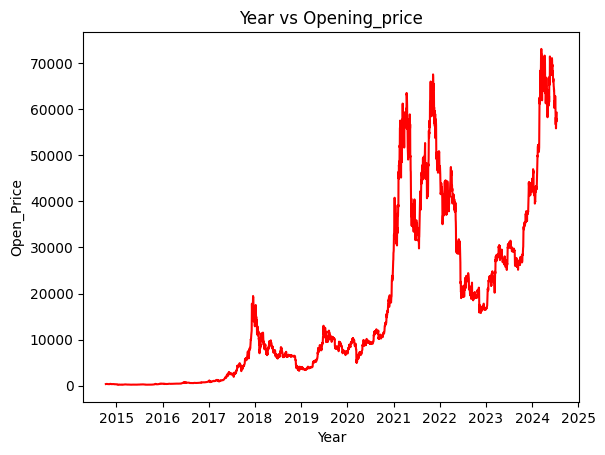

In [5]:
sns.lineplot(data=df, x="Date", y="Open", color='r')        # to draw a line chart
plt.xlabel("Year")      # shows title on x-axis
plt.ylabel("Open_Price")        # shows title on y-axis
plt.title("Year vs Opening_price")      # shows title of chart
plt.show()      # shows entire chart

YEAR VS HIGH_PRICE

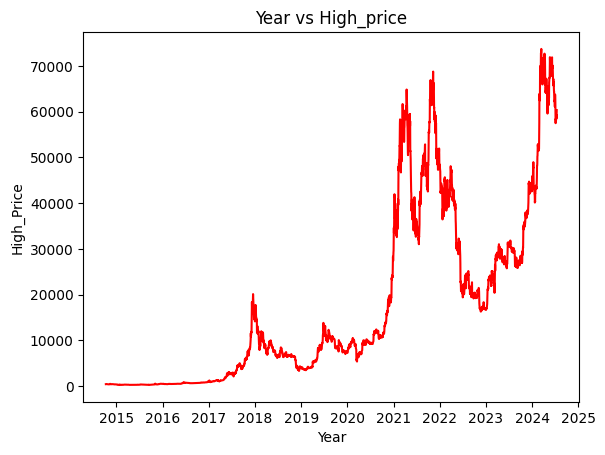

In [6]:
sns.lineplot(data=df, x="Date", y="High", color='r')        # creates line chart
plt.xlabel("Year")      # shows title on x-axis
plt.ylabel("High_Price")        # shows title on y-axis
plt.title("Year vs High_price")     # shows title of chart
plt.show()      # shows entire chart

YEAR VS LOW_PRICE

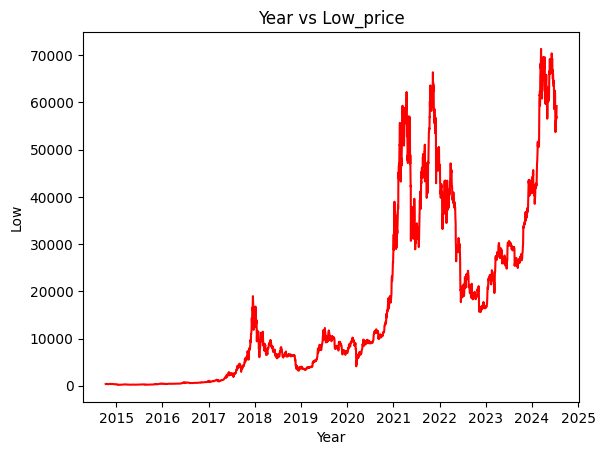

In [7]:
sns.lineplot(data=df, x="Date", y="Low", color='r')     # creates line chart
plt.xlabel("Year")      # shows title on x-axis
plt.ylabel("Low")       # shows title on y-axis
plt.title("Year vs Low_price")      # shows title of chart
plt.show()      # shows entire chart

YEAR VS CLOSING_PRICE(TARGET)

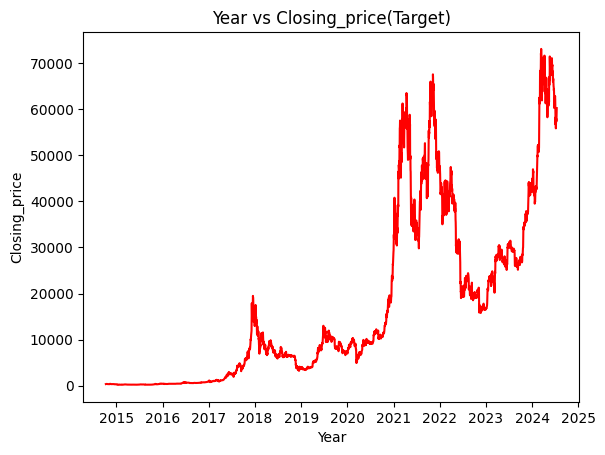

In [8]:
sns.lineplot(data=df, x="Date", y="Close", color='r')       # creates line chart
plt.xlabel("Year")      # shows title on x-axis
plt.ylabel("Closing_price")     # shows title on y-axis
plt.title("Year vs Closing_price(Target)")      # shows entire chart title
plt.show()      # displays entire chart

YEAR VS VOLUME

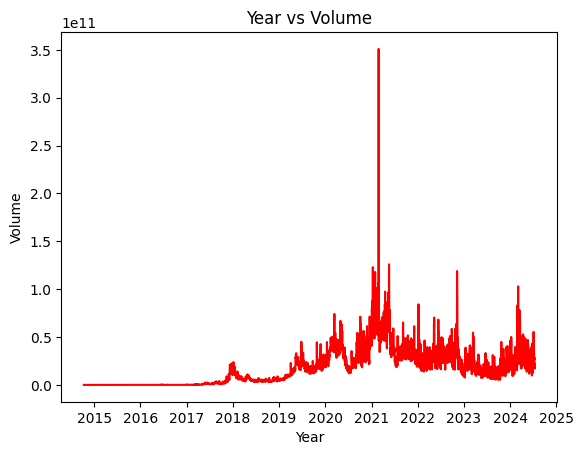

In [9]:
sns.lineplot(data=df, x= "Date",y="Volume", color= 'r')     # creates line chart
plt.xlabel("Year")      # shows title on x-axis
plt.ylabel("Volume")        # shows title on y-axis
plt.title("Year vs Volume")     # shows title of chart
plt.show()      # shows entire chart

HIGH_PRICE VS CLOSE_PRICE

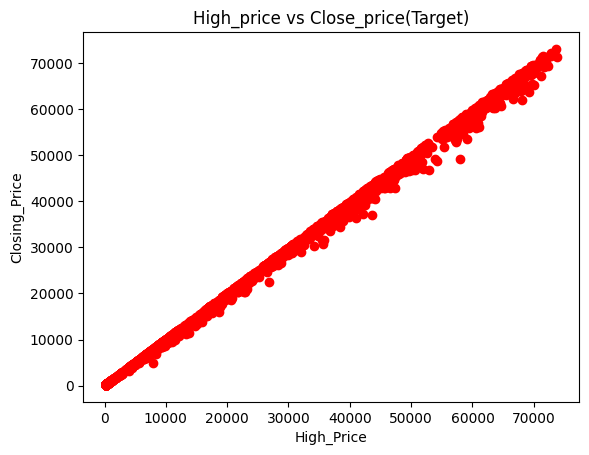

In [10]:
plt.scatter(data=df, x="High", y="Close", color='r')        # creates scatter plot
plt.xlabel("High_Price")        # shows title on x-axis
plt.ylabel("Closing_Price")     # shows title on y-axis
plt.title("High_price vs Close_price(Target)")      # shows title of chart
plt.show()      # shows entire chart

OPEN_PRICE VS CLOSE_PRICE

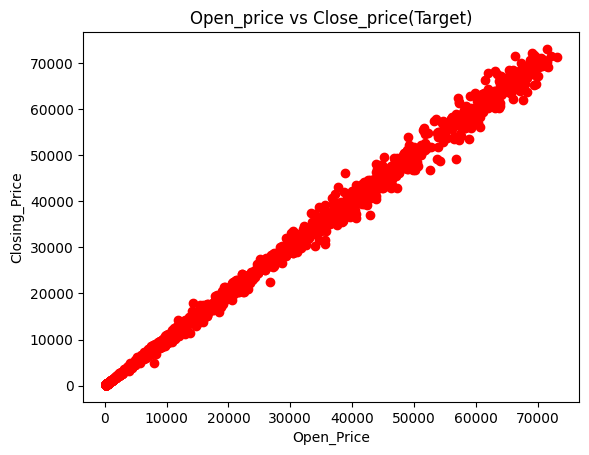

In [11]:
plt.scatter(data=df, x="Open", y="Close", color='r')        # creates scatter plot
plt.xlabel("Open_Price")        # shows title on x-axis
plt.ylabel("Closing_Price")     # shows title on y-axis
plt.title("Open_price vs Close_price(Target)")      # shows title of chart
plt.show()      # shows entire chart

LOW_PRICE VS CLOSE_PRICE

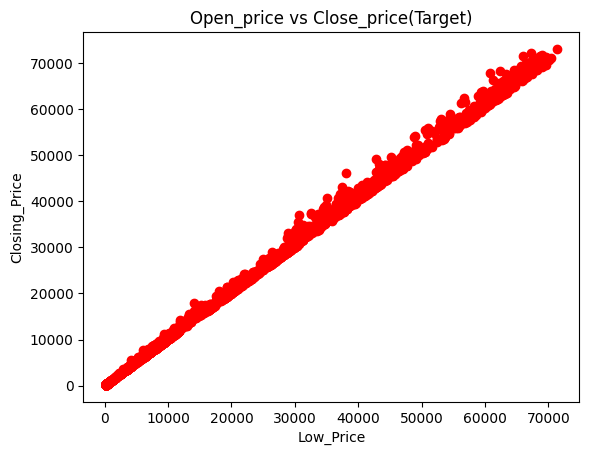

In [12]:
plt.scatter(data=df, x="Low", y="Close", color='r')     # creates scatter plot
plt.xlabel("Low_Price")     # shows title on x-axis
plt.ylabel("Closing_Price")     # shows title on y-axis
plt.title("Open_price vs Close_price(Target)")      # shows title of chart
plt.show()      # shows entire chart

1.5 CORRELATION MATRIX

In [13]:
corr_matrix= df.corr(numeric_only=True)     # Creating co-relation matrix

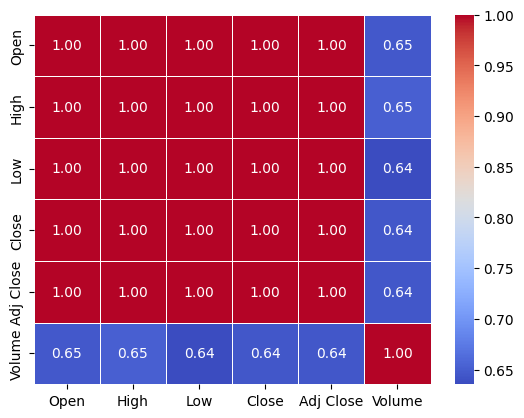

In [14]:
plt.Figure(figsize=(10,8))      # size of chart
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)        # creates correlation matrix
plt.show()      # displays correlation matrix chart

# STEP 2: FEATURE ENGINEERING

Calculation of additional features

In [15]:
df.head()   # Display Feature Engineered top 5 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-10,364.687012,375.066986,352.963013,361.562012,361.562012,43665700.0
2014-10-11,361.362000,367.191010,355.950989,362.299011,362.299011,13345200.0
2014-10-12,362.605988,379.433014,356.144012,378.549011,378.549011,17552800.0
2014-10-13,377.920990,397.226013,368.897003,390.414001,390.414001,35221400.0
2014-10-14,391.691986,411.697998,391.324005,400.869995,400.869995,38491500.0


# STEP 3: MODEL BUILDING

3.1 IMPORT LIBRARIES

In [16]:
from sklearn.model_selection import train_test_split    # Model-Select train test split
from sklearn.ensemble import RandomForestRegressor  # Random Forest Library
from sklearn.tree import DecisionTreeRegressor  # Decision tree Library
from xgboost import XGBRegressor    # XGBoost Library
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score  # Evaluation Metrics

3.2 DEFINE FEATURE

In [17]:
X= df[['Open', 'High', 'Low']]      # selects input features
y= df['Close']      # selects target features

3.3 TRAIN TEST SPLIT

In [18]:
(X_train, X_test, y_train, y_test)= train_test_split(X, y, random_state=42, test_size=0.2)      # train test split in 80:20 ratio

3(1) RANDOM FOREST

In [19]:
model= RandomForestRegressor()      # selects model
model.fit(X_train, y_train)     # Fit Random Forest Regressor

RandomForestRegressor()

PREDICT MODEL

In [20]:
y_pred_rf= model.predict(X_test)        # predicts the model

EVALUATION

In [21]:
RMSE= root_mean_squared_error(y_test, y_pred_rf)        # calculates Root Mean Squared Error value
MAE= mean_absolute_error(y_test,y_pred_rf)      # calculates Mean Absolute Error value
R2= r2_score(y_test, y_pred_rf)     # calculates R Squared value



print(f'RMSE:{RMSE:.2f}')       # shows Root Mean Squared Error value
print(f'MAE:{MAE:.2f}')     # shows Mean Absolute Error value
print(f'R2:{R2:.4f}')       # shows R Squared value

RMSE:425.16
MAE:209.19
R2:0.9995


GRAPH FOR RANDOM FOREST

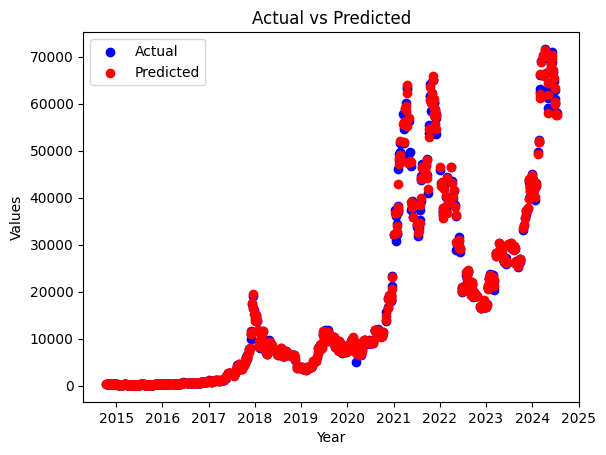

In [22]:
plt.scatter(X_test.index, y_test, color='b', label= "Actual")       # creates scatter plot for actual value
plt.scatter(X_test.index, y_pred_rf, color='r', label= "Predicted")     # creates scatter plot for predicted value
plt.xlabel("Year")      # shows title of x-axis
plt.ylabel("Values")        # shows title on y-axis
plt.title("Actual vs Predicted")        # shows title of chart
plt.legend()        # creates color identification
plt.show()      # shows entire chart

3(2) DECISION TREE

In [23]:
model1= DecisionTreeRegressor()     # selects model
model1.fit(X_train,y_train)     # fit the selected model

DecisionTreeRegressor()

PREDICT MODEL

In [24]:
y_pred_dt= model1.predict(X_test)       # predicts the model

EVALUATION

In [25]:
RMSE= root_mean_squared_error(y_pred_dt, y_test)        # calculates Root Mean Squared Error value
MAE= mean_absolute_error(y_pred_dt,y_test)      # calculates Mean Absolute Error value
R2= r2_score(y_pred_dt,y_test)      # calculates R Squared value



print(f'RMSE:{RMSE:.4F}')       # shows Root Mean Squared Error value
print(f'MAE:{MAE:.4f}')     # shows Mean Absolute Error value
print(f'R2:{R2:.4f}')       # shows R Square value

RMSE:572.4395
MAE:257.6836
R2:0.9991


GRAPH FOR DECISION TREE

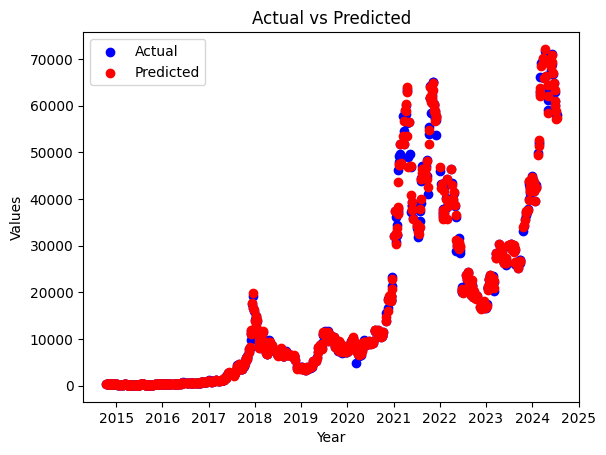

In [26]:
plt.scatter(X_test.index, y_test, color='b', label="Actual" )       # creates scatter plot for actual values
plt.scatter(X_test.index, y_pred_dt, color='r', label= "Predicted")     # creates scatter plot for predicted values
plt.xlabel("Year")      # shows title on x-axis
plt.ylabel("Values")        # shows title on y-axis
plt.title("Actual vs Predicted")        # shows title of chart
plt.legend()        # shows color identification
plt.show()      # shows entire chart

3(3) XGBOOST

In [27]:
model2= XGBRegressor()      # selects the model
model2.fit(X_train, y_train)        # fits the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

PREDICTION

In [28]:
y_pred_xg= model2.predict(X_test)       # predicts the model

EVALUATION

In [29]:
RMSE= root_mean_squared_error(y_pred_xg,y_test)     # calculates Root Mean Squared Error value
MAE= mean_absolute_error(y_pred_xg,y_test)      # calculates Mean Absolute Error value
R2= r2_score(y_pred_xg,y_test)      # calculates R Square value


print(f'RMSE:{RMSE:.4f}')       # shows Root Mean Square Error value
print(f'MAE:{MAE:.4f}')     # shows Mean Absolute Error value
print(f'R2:{R2:.4f}')       # shows R Square value

RMSE:463.2158
MAE:226.5810
R2:0.9994


GRAPH of XGBoost

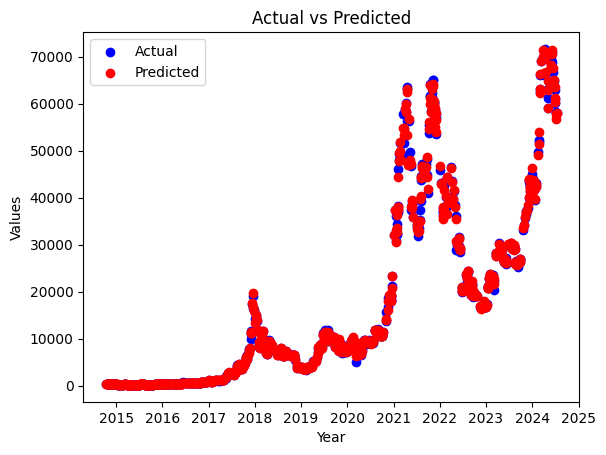

In [30]:
plt.scatter(X_test.index, y_test, c='b', label="Actual")        # creates scatter plot for actual value
plt.scatter(X_test.index, y_pred_xg, c='r', label='Predicted')      # creates scatter plot for predicted value
plt.xlabel("Year")      # shows title on x-axis
plt.ylabel("Values")        # shows title on y-axis
plt.title("Actual vs Predicted")        # shows title of chart
plt.legend()        # creates color identification
plt.show()      # shows entire chart

# TIME SERIES

ARIMA

Import Library

In [31]:
from statsmodels.tsa.arima.model import ARIMA       # import ARIMA model

In [32]:

y= df['Close']      # output feature

Train Test Split

In [33]:
split_point=  int(len(y)*0.8)       # choose split point
y_train,y_test= y[:split_point], y[split_point:]        # selects split points

In [34]:
# remove warning messages
import warnings
warnings.filterwarnings("ignore")

Fit Model

In [35]:
model3= ARIMA(y_train, order=(2,1,2))       # select the model
result= model3.fit()        # fits the model

In [36]:
print(result.summary())     # shows summary of results

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2852
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -23120.788
Date:                Sat, 30 Aug 2025   AIC                          46251.576
Time:                        02:58:21   BIC                          46281.353
Sample:                    10-10-2014   HQIC                         46262.314
                         - 07-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8155      0.010     79.734      0.000       0.795       0.836
ar.L2         -0.9443      0.009   -100.618      0.000      -0.963      -0.926
ma.L1         -0.8487      0.010    -85.021      0.0

Predict

In [37]:
y_pred_arima= result.predict(start=len(y_train), end=len(y_train)+len(y_test)-1,type='levels')      # predicts the model

Evaluation

In [38]:
RMSE= root_mean_squared_error(y_test,y_pred_arima)      # calculates Root Mean Squared Error value
MAE= mean_absolute_error(y_test,y_pred_arima)       # calculates Mean Absolute Error value
R2= r2_score(y_test,y_pred_arima)       # calculates R Square value



print(f'RMSE:{RMSE:.4f}')       # shows Root Mean Square Error value
print(f'MAE:{MAE:.4f}')     # shows Mean Absolute Error value
print(f'R2:{R2:.4f}')       # shows R Square value

RMSE:20570.8425
MAE:13971.1272
R2:-0.4952


SARIMA

Import Libraries

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX      # import SARIMAX library

Model fit

In [40]:
model4= SARIMAX(y_train,order=(1,1,1), seasonal_order=(1,1,1,12))       # selects the model
result=model4.fit()     # fit the model

Prediction

In [41]:
y_pred_sarima= result.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, type= 'levels')       # predicts the model

In [42]:
print(result.summary())     # shows result summary

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2852
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -23063.779
Date:                            Sat, 30 Aug 2025   AIC                          46137.558
Time:                                    02:59:26   BIC                          46167.314
Sample:                                10-10-2014   HQIC                         46148.291
                                     - 07-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9999      5.169     -0.193      0.847     -11.131       9.132
ma.L1          0.9999      4.683   

Evaluation

In [43]:
RMSE= root_mean_squared_error(y_test,y_pred_sarima)     # calculates Root Mean Squared Error value
MAE= mean_absolute_error(y_test,y_pred_sarima)      # calculates Mean Absolute Error value
R2= r2_score(y_test,y_pred_sarima)      # calculates R Squared value



print(f'RMSE:{RMSE:.4f}')       # shows Root Mean Squared Error value
print(f'MAE:{MAE:.4f}')     # shows Mean Absolute Error value
print(f'R2:{R2:.4f}')       # shows R Square value

RMSE:17777.4845
MAE:11690.3518
R2:-0.1167


ARIMA vs SARIMA Comparison

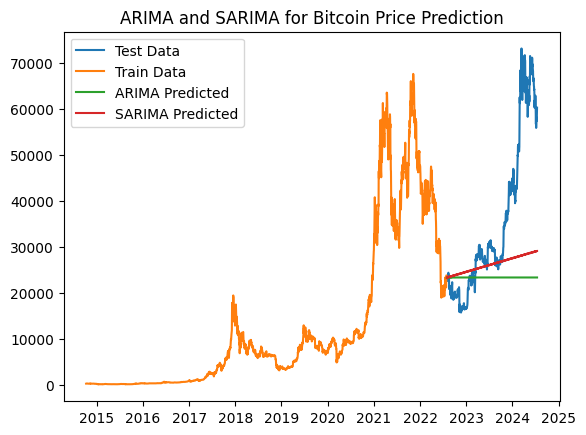

In [44]:
plt.Figure(figsize=(10,8))      # creates image with size
plt.plot(y_test.index,y_test, label= 'Test Data')       # creates line chart for test data
plt.plot(y_train.index,y_train, label= 'Train Data')        # creates line chart for train data
plt.plot(y_pred_arima, label= 'ARIMA Predicted')        # creates line chart for ARIMA
plt.plot(y_pred_sarima, label= 'SARIMA Predicted')      # creates line chart for SARIMA
plt.title('ARIMA and SARIMA for Bitcoin Price Prediction')      # shows title of chart
plt.legend()        # creates color identification
plt.show()      # shows entire chart

# STEP 3: HYPERPARAMETER TUNING

Import Libraries

In [45]:
from sklearn.model_selection import GridSearchCV        # import GridsearchCV model

Tuning GridsearchCV

In [46]:
# parameter for grid search cv
param_grid={
    'n_estimators':[10,30,50],
    'max_depth':[5,10],
    'min_samples_split':[2,4],
}

In [47]:
grid_search= GridSearchCV(
    estimator= RandomForestRegressor(),
    param_grid= param_grid,
    cv=5,       # cross validation=5
    n_jobs=1,
    verbose=1
)

Model fit

In [48]:
grid_search.fit(X_train,y_train)        # fit grid search cv

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': [5, 10], 'min_samples_split': [2, 4],
                         'n_estimators': [10, 30, 50]},
             verbose=1)

In [49]:
best_rf= grid_search.best_estimator_        # selects best model

Prdiction

In [50]:
y_pred_grid= best_rf.predict(X_test)        # predicts the model

Evaluation

In [51]:
RMSE= root_mean_squared_error(y_test, y_pred_grid)      # calculates Root Mean Squared Error value
MAE= mean_absolute_error(y_test,y_pred_grid)        # calculates Mean Absolute Error value
RSQUARE= r2_score(y_test, y_pred_grid)      # calculates R Square value


print(f'RMSE:{RMSE:.4f}')       # shows Root Mean Squared Error value
print(f'MAE:{MAE:.4f}')     # shows Mean Absolute Error value
print(f'RSQUARE:{RSQUARE:.4f}')     # shows R square value

RMSE:28159.0572
MAE:22623.5847
RSQUARE:-1.8017


# STEP 4: DEPLOYMENT

Import Libraries

In [52]:
import joblib       # to save model
import streamlit as st      # to deploy model

Save model

In [53]:
joblib.dump(model, 'bitcoin_deploy.pkl')        # saves the model

['bitcoin_deploy.pkl']

Load the Model

In [54]:
model5= joblib.load('bitcoin_deploy.pkl')       # load the model

Calculates and predict model

In [55]:
# title of application
st.title("BITCOIN PRICE PREDICTION")

# input features
Open_Price = st.number_input("Enter Open Price")
High_Price = st.number_input("Enter High Price")
Volume= st.number_input("Enter Volume")

# calculates and predicts results
if st.button("Predict Close Price"):
    input_data= np.array([[Open_Price,High_Price,Volume]])


    prediction= model5.predict(input_data)
    st.success(f'Predicted Close Price:${prediction[0]:.2f}')

2025-08-30 03:00:55.039 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-30 03:00:56.547 
  command:

    streamlit run C:\Users\NAVEEN KUMAR S\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-30 03:00:56.549 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-30 03:00:56.551 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-30 03:00:56.552 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-30 03:00:56.554 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-30 03:00:56.556 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-30 03:00:56

# Convert VSCode to Script

In [57]:
!jupyter nbconvert --to script BITCOINPRICE_1.ipynb     # Convert to script

[NbConvertApp] WARNING | pattern '#' matched no files
[NbConvertApp] WARNING | pattern 'Convert' matched no files
[NbConvertApp] WARNING | pattern 'to' matched no files
[NbConvertApp] WARNING | pattern 'script' matched no files
[NbConvertApp] Converting notebook BITCOINPRICE_1.ipynb to script
[NbConvertApp] Writing 13442 bytes to BITCOINPRICE_1.py
